
Q.1 Write a program to
1. load an RGB image of any image format (JPG, PNG, etc.) and size
using OpenCV and convert it to gray image with a resoluton of
256x256.
2. Display both RGB and Gray image side-by-side using matplotlib
3. Save the Gray image as <same-name>.JPG.
4. Flip the RGB Image horizontally and ver4cally and display the
original and flipped images side-by-side.
5. Perform random crops of 128x128 and rescale it to 256x256. Display
the center point and a rectangle of 128x128 on the RGB image and
cropped & scaled image side by side

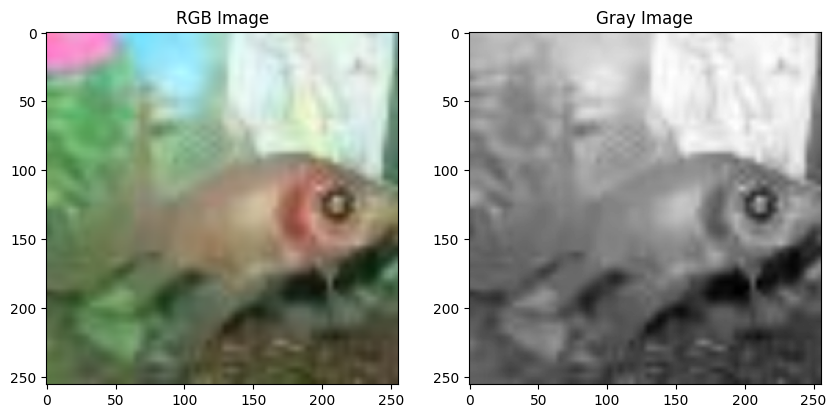

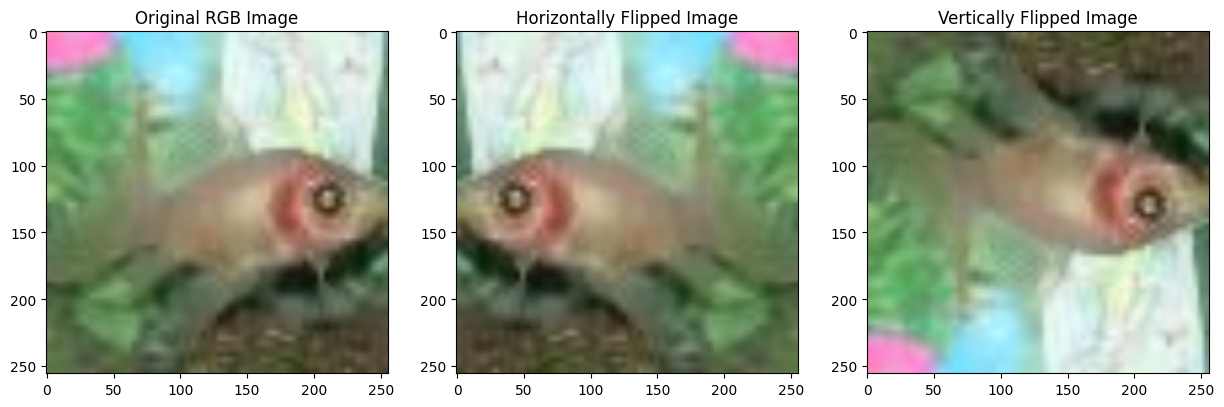

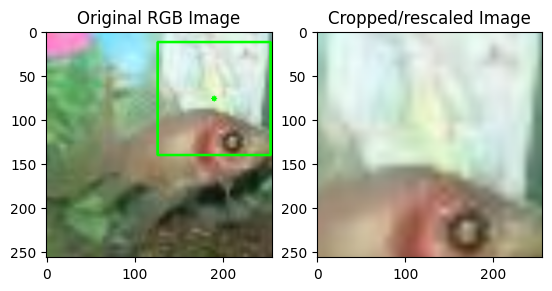

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

path = r"C:\Users\Asus\Documents\Python Codes\Assignments\Computer Vision\Tiny-ImageNet\train\n01443537\images\n01443537_0.JPEG"  
rgb = cv2.imread(path)    #Used an Image from TinyImageNet which is of 64x64 resolution
rgb = cv2.resize(rgb, (256, 256))   #Rescaled to 256 by 256
gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB))
plt.title("RGB Image")
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap="gray")
plt.title("Gray Image")

output_path = path.split(".")[0] + "_gray.jpg"  #Saving the Gray Image
cv2.imwrite(output_path, gray)

flipped_horizontal = cv2.flip(rgb, 1)
flipped_vertical = cv2.flip(rgb, 0)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB))
plt.title("Original RGB Image")
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(flipped_horizontal, cv2.COLOR_BGR2RGB))
plt.title("Horizontally Flipped Image")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(flipped_vertical, cv2.COLOR_BGR2RGB))
plt.title("Vertically Flipped Image")

Valid_x_range = rgb.shape[0] - 128
Valid_y_range = rgb.shape[1] - 128
# print(Valid_x_range)

# Perform random crop and rescale
crop_x = np.random.randint(0, Valid_x_range + 1)
crop_y = np.random.randint(0, Valid_y_range + 1)
cropped_image = rgb[crop_y:crop_y + 128, crop_x:crop_x + 128]
rescaled_image = cv2.resize(cropped_image, (256, 256))

# Drawing the center point and rectangle on the RGB image
cv2.rectangle(rgb, (crop_x, crop_y), (crop_x + 128, crop_y + 128), (0, 255, 0), 2)
cv2.circle(rgb, (crop_x + 64, crop_y + 64), 3, (0, 255, 0), -1)

# Displaying the Final Images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB))
plt.title("Original RGB Image")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rescaled_image, cv2.COLOR_BGR2RGB))
plt.title("Cropped/rescaled Image")

plt.show()


Q.[2] Write a program to load a sample video of any video format (AVI, MP4, etc.)
using OpenCV and extract its every kth frame (k is user specified) with
original color representayion (RGB/Gray) and rescale to 256x256 size and
save them with <frame-number>.JPG to a folder <video-name>

In [2]:
import os

video = cv2.VideoCapture(r"C:\Users\Asus\Documents\Python Codes\Assignments\Computer Vision\person24_running_d2_uncomp.avi")

k=int(input("Enter which frame to be read : "))
frame_counter=0
output_path=r"C:\Users\Asus\Documents\Python Codes\Assignments\Computer Vision\Saved_Frames"

while True:
    Not_end , frame = video.read()
    frame_counter+=1
    if Not_end:
        # print(1)
        if frame_counter % k == 0:
            # print(frame.shape)
            channels=frame.shape[2] # Checking No of channels to know whether frame is gray or RGB
            if channels == 3:   #RGB frame
                frame = cv2.cvtColor(cv2.resize(frame,(256,256)),cv2.COLOR_BGR2RGB)
            else:               #GRAY frame
                frame = cv2.cvtColor(cv2.resize(frame,(256,256)),cv2.COLOR_BGR2GRAY)

            frame_filename = os.path.join(output_path, f"{frame_counter}.jpg")
            cv2.imwrite(frame_filename, frame)
    
    else:
        break


Q.[3].
1. Write a program to represent each image in train/test datasets to a
frequency histogram and save to comma separated values (CSV) files
as train.csv and test.csv
2. Normalize each feature to N(0,1) also apply the respec4ve
transforma4ons to test data.
3. Use the t-SNE plot of the dataset with different color to different
class.
4. Implement the least square method and evaluate on the dataset
generated. Use for any two classes as well as all classes.


In [3]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
# img = cv2.imread(r"C:\Users\Asus\Documents\Python Codes\Assignments\Computer Vision\MNIST\trainingSet\0\img_1.jpg")
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# print(img.shape)

path = r"C:\Users\Asus\Documents\Python Codes\Assignments\Computer Vision\MNIST\trainingSet\\"
train=[]
train_label=[]
for i in os.listdir(path) :
  for j in os.listdir(path+i):
    train.append(cv2.imread(path+i+"\\"+j, cv2.IMREAD_GRAYSCALE))
    train_label.append(i)
train=np.array(train)

path=r"C:\Users\Asus\Documents\Python Codes\Assignments\Computer Vision\MNIST\testSet\\"
test=[]

for i in os.listdir(path) :
    test.append(cv2.imread(path+i, cv2.IMREAD_GRAYSCALE))
test=np.array(test)


In [4]:
train = train.reshape(42000,-1)
test = test.reshape(28000,-1)

In [5]:
def Calculate_Histogram(Images):
    Histogram=[]
    for image in Images:
        Hist=[0]*256
        for pixel in image:
            Hist[pixel]+=1
        Histogram.append(Hist)
    return np.array(Histogram)

In [6]:
train.shape

(42000, 784)

In [7]:
Train = Calculate_Histogram(train)
Test = Calculate_Histogram(test)

In [23]:
import pandas as pd

# Creating DataFrames for train and test sets
train_df = pd.DataFrame(data=Train)
test_df = pd.DataFrame(data=Test)

# Save the DataFrames to CSV files
train_df["label"] = train_label
train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv", index=False)


In [22]:
# Normalizing the Train and Test data

def Normalize(Data):
    max = np.amax(Data,axis=0)
    min = np.amin(Data,axis=0)
    return (Data - min)/(max-min)

Train_Normalized = Normalize(Train)
Test_Normalized = Normalize(Test)


# print(Train_Normalized)

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


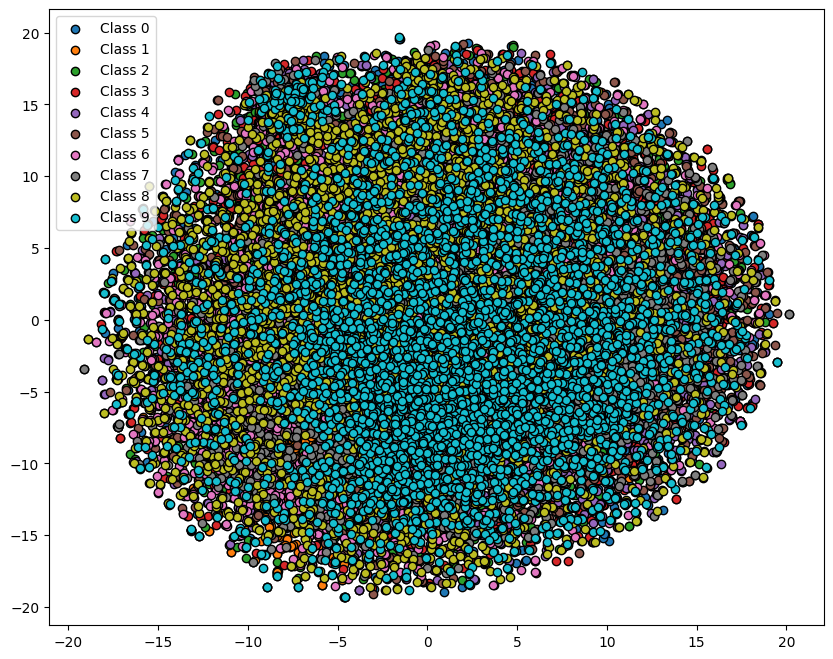

In [21]:
from sklearn.manifold import TSNE

#Code referred from TSNE official page

tsne = TSNE(n_components=2, random_state=43)
Train_Transformed = tsne.fit_transform(Train_Normalized)

tsne_df = pd.DataFrame(data=Train_Transformed, columns=['1st Dimension', '2nd Dimension'])
tsne_df['Class'] = train_label

unique_classes = np.unique(train_label)

plt.figure(figsize=(10, 8))
for class_label in unique_classes:
    class_data = tsne_df[tsne_df['Class'] == class_label]
    plt.scatter(class_data['1st Dimension'], class_data['2nd Dimension'], label=f'Class {class_label}',edgecolors='black')

plt.legend()
plt.show()


Q[4].Write a program for the Principal Component Analysis (PCA) from scratch.
Compute the coefficients from the train.csv and apply on both train.csv and test.csv use 2D scaWer plot to visualize both the datasets separately using PC1 vs PC2

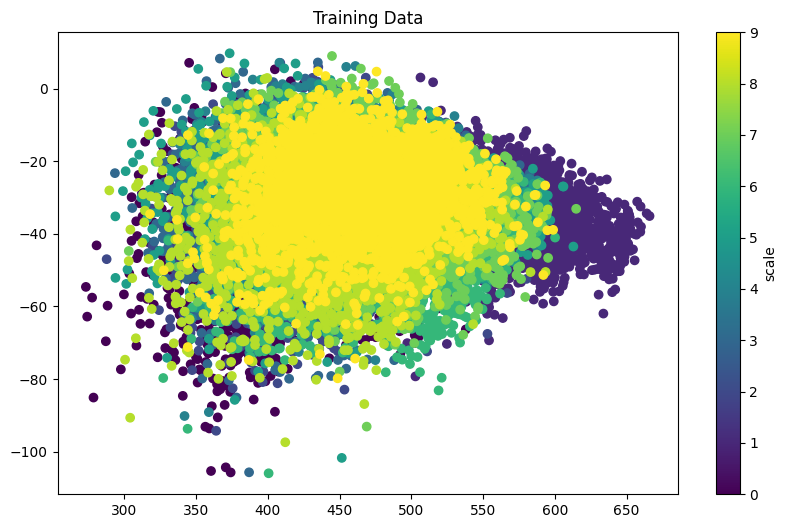

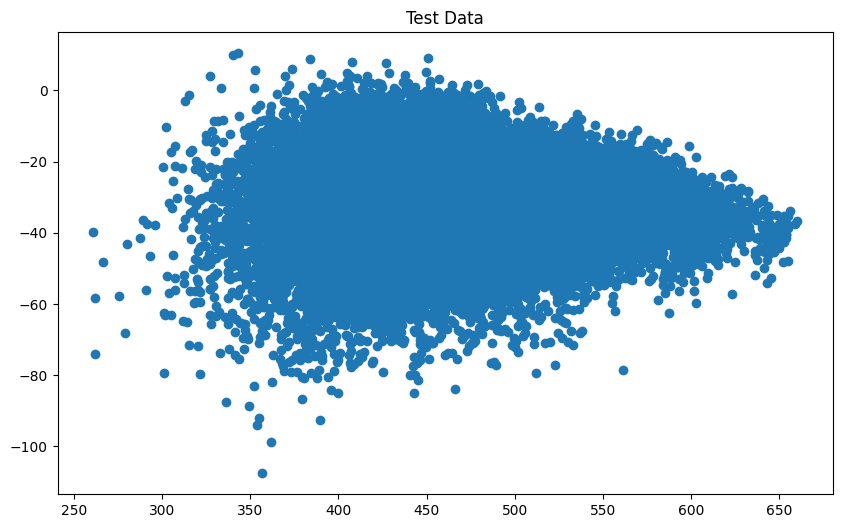

In [28]:
# Load the training and test datasets from CSV files
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

X_train = train_df.drop(columns=["label"]).values
X_test = test_df.values

def PCA(Data):
       
    # Computing the covariance matrix
    cov_matrix = np.cov(Data, rowvar=False)
    
    # Calculating the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Selecting the top 2 eigenvectors
    top_eigenvectors = eigenvectors[:, :2]
    
    principal_components = Data @ top_eigenvectors
    
    return principal_components, top_eigenvectors

#Computing Principle Components by Projecting data onto the dominant EV
Train_pca, _ = PCA(X_train)
Test_pca,_ = PCA(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(Train_pca[:, 0], Train_pca[:, 1], c=train_df["label"])
plt.colorbar(label="scale")
plt.title("Training Data")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(Test_pca[:, 0], Test_pca[:, 1])
plt.title("Test Data")
plt.show()
